## What we are going to cover

* Getting a dataset to work with

* Architecture of a convolutional neural network

* A quick end-to-end example:

* Steps in modelling binary image classification with CNNs
    - Becoming one with the data
    - Preparing data for modelling
    - Creating a CNN model (starting with a baseline)
    - Fitting a model (getting it to find patterns in our data)
    - Evaluating a model
    - Improving a model
    - Making a predictions with a trained model

* Steps in modelling for multi-class image classification with CNNs
    - Same as above (but this time with a f

## get the dataset

https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

In [1]:
!pwd

/d/ML/tensorflow-deep-learning/practices


In [2]:
!ls

00-memo.md
00_review.ipynb
00_tensorflow_fundamentals (exercise).ipynb
00_tensorflow_fundamentals (part1).ipynb
00_tensorflow_fundamentals (part2).ipynb
01-memo.md
01_neural_network_regression (exercise).ipynb
01_neural_network_regression (part1).ipynb
01_neural_network_regression (part2).ipynb
02_nerual_network_classification (part1).ipynb
02_nerual_network_classification (part3).ipynb
02_neural_network_classification (part2).ipynb
03_convolutional_neural_network.ipynb
best_model_HDF5_format.h5
best_model_SavedModel_format
insurance.csv
kc_house_data.csv
model.png
pizza_steak
tinyVGG
titanic
titanic.zip


In [3]:
cd pizza_steak

D:\ML\tensorflow-deep-learning\practices\pizza_steak


In [4]:
cd ..

D:\ML\tensorflow-deep-learning\practices


In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [6]:
# Another way to find out how many images are in a file
dir_list = ['./pizza_steak/train/steak',
           './pizza_steak/train/pizza',
            './pizza_steak/test/steak',
            './pizza_steak/test/pizza'
           ]

for i in dir_list:
    num = len(os.listdir(i))
    print(f'{i} images: {num}')

./pizza_steak/train/steak images: 750
./pizza_steak/train/pizza images: 750
./pizza_steak/test/steak images: 250
./pizza_steak/test/pizza images: 250


In [7]:
# Get the class names (programmatically, this is much more helpful with longer list of classes)
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train/') # turn our training path a python path
for item in data_dir.glob('*'):
    print(item.name)
    
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

pizza
steak
['pizza' 'steak']


In [8]:
sorted([item.name for item in data_dir.glob('*')])

['pizza', 'steak']

In [9]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    # Setup target directory (we will view images from here)
    target_folder = target_dir+target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    # Display the image
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    # Print shape of the image
    print(f'Image shape: {img.shape}') # show the shape of the image
    return img

Image shape: (512, 512, 3)


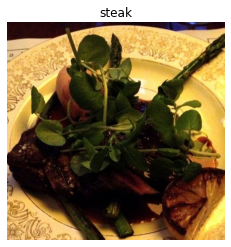

In [10]:
img = view_random_image(target_dir = 'pizza_steak/train/',target_class = 'steak')

In [11]:
print(f'img dtype {img.dtype}')
print(f'image shape {img.shape}')

img dtype uint8
image shape (512, 512, 3)


In [12]:
img

array([[[ 44,  15,  19],
        [ 35,   6,  10],
        [ 33,   2,   7],
        ...,
        [ 36,  10,  11],
        [ 34,   8,   9],
        [ 35,   6,   8]],

       [[ 33,   4,   6],
        [ 33,   4,   6],
        [ 37,   7,   9],
        ...,
        [ 37,  11,  12],
        [ 41,  12,  14],
        [ 41,  12,  14]],

       [[ 35,   6,   8],
        [ 34,   5,   7],
        [ 34,   4,   6],
        ...,
        [ 38,   9,  11],
        [ 39,  10,  12],
        [ 39,   9,  11]],

       ...,

       [[214, 173, 109],
        [197, 156,  92],
        [168, 124,  61],
        ...,
        [240, 187, 107],
        [225, 172,  94],
        [223, 170,  92]],

       [[195, 154,  92],
        [179, 138,  76],
        [170, 126,  65],
        ...,
        [243, 192, 113],
        [231, 179, 103],
        [222, 170,  94]],

       [[180, 139,  77],
        [186, 145,  83],
        [191, 146,  87],
        ...,
        [235, 184, 105],
        [236, 184, 108],
        [235, 186, 109]]

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [13]:
img/255

array([[[0.17254902, 0.05882353, 0.0745098 ],
        [0.1372549 , 0.02352941, 0.03921569],
        [0.12941176, 0.00784314, 0.02745098],
        ...,
        [0.14117647, 0.03921569, 0.04313725],
        [0.13333333, 0.03137255, 0.03529412],
        [0.1372549 , 0.02352941, 0.03137255]],

       [[0.12941176, 0.01568627, 0.02352941],
        [0.12941176, 0.01568627, 0.02352941],
        [0.14509804, 0.02745098, 0.03529412],
        ...,
        [0.14509804, 0.04313725, 0.04705882],
        [0.16078431, 0.04705882, 0.05490196],
        [0.16078431, 0.04705882, 0.05490196]],

       [[0.1372549 , 0.02352941, 0.03137255],
        [0.13333333, 0.01960784, 0.02745098],
        [0.13333333, 0.01568627, 0.02352941],
        ...,
        [0.14901961, 0.03529412, 0.04313725],
        [0.15294118, 0.03921569, 0.04705882],
        [0.15294118, 0.03529412, 0.04313725]],

       ...,

       [[0.83921569, 0.67843137, 0.42745098],
        [0.77254902, 0.61176471, 0.36078431],
        [0.65882353, 0


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

In [14]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup the train and test directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size = 32, # number of images to process at a time
                                              target_size = (224,224), # convert all images to be 224x224
                                              class_mode = 'binary', # type of problem we are working on
                                              seed = 42
                                              )

valid_data = valid_datagen.flow_from_directory(test_dir,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = 'binary',
                                            seed = 42
                                            )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
dir(train_data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format',
 'save_prefix',
 'save_to_dir',
 'see

In [16]:
# Create a CNN model (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
    # 3 layers first
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = (3,3), # can be also 3
                           activation = 'relu',
                           input_shape = (224,224,3) # first layer specifies input shape (height,width,color_channels)
                          ),
    
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = (3,3),
                           activation = 'relu'
                          ),
    
    tf.keras.layers.MaxPool2D(pool_size = (2,2), # pool_size can also be (2,2)
                             padding = 'valid' # padding can also be 'same', 'valid'
                             ),
    # 3 layers second
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    # flatten layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid') # binary activation ouput
])

# Compile the model
model_1.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data)
                       )

Epoch 1/5
47/47 [==============================] - 109s 2s/step - loss: 0.5572 - accuracy: 0.7133 - val_loss: 0.4247 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 107s 2s/step - loss: 0.4367 - accuracy: 0.7973 - val_loss: 0.3446 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 109s 2s/step - loss: 0.4044 - accuracy: 0.8240 - val_loss: 0.3463 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 123s 3s/step - loss: 0.3690 - accuracy: 0.8433 - val_loss: 0.3193 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 111s 2s/step - loss: 0.3477 - accuracy: 0.8593 - val_loss: 0.2902 - val_accuracy: 0.8860


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

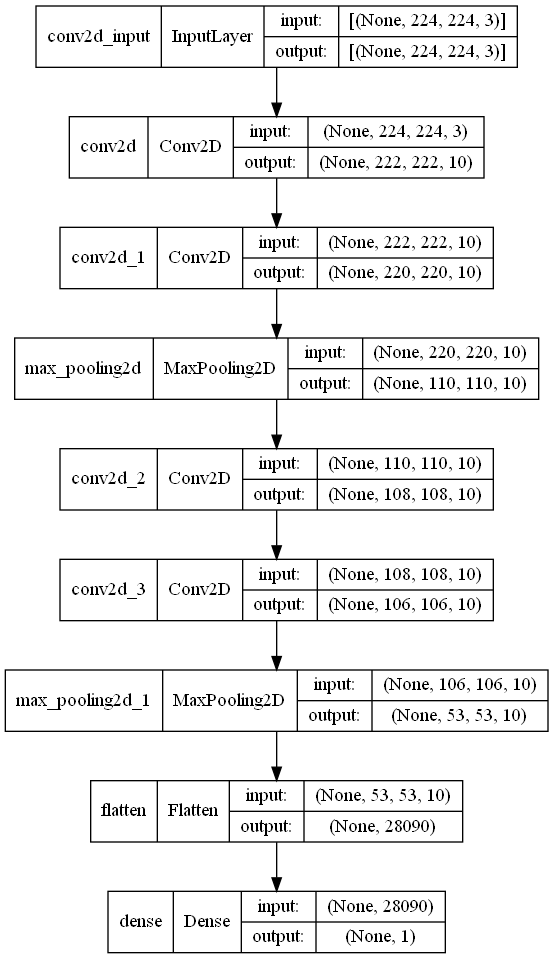

In [19]:
from tensorflow.keras.utils import plot_model

plot_model(model_1,show_shapes = True)

In [20]:
# Save your model
model_1.save('tinyVGG')

INFO:tensorflow:Assets written to: tinyVGG\assets


In [21]:
import pandas as pd

<AxesSubplot:title={'center':'loss curve'}>

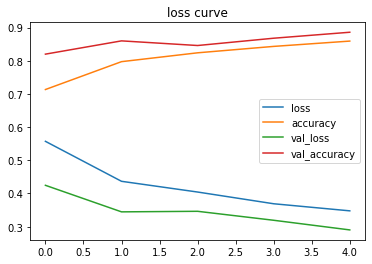

In [22]:
pd.DataFrame(history_1.history).plot(title = 'loss curve')

# tensorflow layers

## Convolutional layers

- Matrix X.shape `(W,H,color)`
- Kernel W.shape `(k,k)` (k is odd number)
- X x W = Y `(W-k+1,H-k+1)` < `(W,H)`

### Padding
If you want Y have a same shape of X you must add zero in the border of X `padding = k` meaning add k  vector zero to the border of the matrix

### Stride
Is the step of the kernel will jump in the horizontal and vertical
The general formular:
- Matrix X.shape `(W,H,color)`
- Kernel W.shape `(k,k)` (k is odd number)
- Stride = `s`
- Padding = `p`
- X x W = Y `((W-k+2p)/s + 1,(H-k+2p)/s + 1)` < `(W,H)`

In [23]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Image shape: (512, 512, 3)


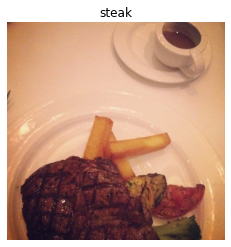

In [39]:
img = view_random_image(target_dir = 'pizza_steak/train/',target_class = 'steak')

In [25]:
# identity
kernel_i = np.array([[0,0,0],
                   [0,1,0],
                   [0,0,0]
                  ])

# edge detection

kernel_e1 = np.array([[1,0,-1],
                   [0,0,0],
                   [-1,0,1]
                  ])

kernel_e2 = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]
                  ])

kernel_e3 = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]
                  ])


kernel_sharpen = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]
                  ])

kernel_blur = 1/9 * np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]
                  ])

In [26]:
img.shape, kernel_i.shape

((306, 512, 3), (3, 3))

In [27]:
img[0:3,0:3].shape

(3, 3, 3)

In [28]:
img[:,:,0].shape

(306, 512)

done


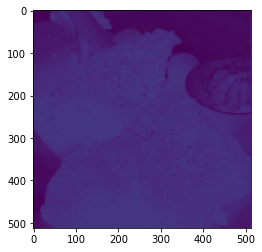

In [101]:
# turn grey
img_grey = img[:,:,0] * 0.299 + img[:,:,1] * 0.587 + img[:,:,2] * 0.114 
img_grey.shape

k = 3 # the kernel size
# create a empty array
y = np.zeros_like(img_grey)
plt.imshow(y)

for i in range(img_grey.shape[1] - k + 1):
    for j in range(img_grey.shape[0] - k + 1):
        #print(i,j)
        x = img_grey[i:i+k,j:j+k]
        y[i:i+k,j:j+k] = x * kernel_e3# multiply elementwise
        #plt.imshow(x)
print('done')
plt.imshow(y)

In [103]:
y

array([[-235.665, -236.665, -237.893, ..., -228.091, -227.091, -229.162],
       [-235.665, -235.665, -236.893, ..., -229.091, -226.162, -224.162],
       [-240.665, -236.665, -234.893, ..., -229.162, -228.162, -223.934],
       ...,
       [-195.926, -199.926, -204.915, ..., -161.152, -157.152, -155.152],
       [-199.926, -199.926, -204.915, ..., -161.679, 1285.432, -160.679],
       [-207.926, -201.926, -202.915, ..., -158.679, -161.679, -163.679]])

In [125]:
np.random.randint(0,512)

160

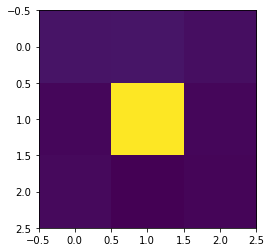

In [169]:
i = np.random.randint(0,img_grey.shape[0])
j = np.random.randint(0,img_grey.shape[1])
k = 3
x = img_grey[i:i+k,j:j+k]
#plt.imshow(x)
y = x * kernel_e3
plt.imshow(y)

> **Note**: 

        - With the pixels stay closely together, they have a strong connection
        
        - With convolution kernel, just one kernel used for all pixels in the image, otherwords, all pixels share the same    parameters
        
Use the convulution kernel we can solve the problem large parameters within the fully connected (Dense) can not

### convolutional with a tensor 

- Input `(W,H,D)`
    * `W`: width of image
    * `H`: height of image
    * `D`: depth (with image depth = 3)


- Kernel `(F,F,D)` Stride `S`, Padding `P`, Number of Filter `K`
    * `F`: kernel size
    * `D`: the same depth of the image
    * `S`: the stride (default value 1)
    * `P`: the padding

$ Output = (\frac{H-F+2P}{S}+1)*(\frac{W-F+2P}{S}+1)*K $
 
 > **Note**:
 
 - Output of convolutional layer will calculated by the activation function before become the input of next convolutional layer
 
 - Total parameter of layer: each layer have `F*F*D` + 1 bias, if you got K filter `K*(F*F*D + 1)`
 
 
 **Example**
 
 - Input shape `(64,64,3)`
 
 - kernel `(3,3,3)`, stride: `1`, padding: `1`
 
 - Output `(64,64,k)`

Text(0.5, 1.0, 'original')

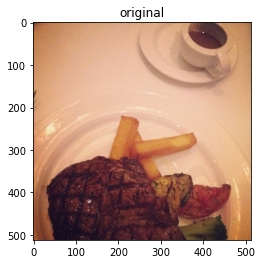

In [64]:
plt.imshow(img)
plt.title("original")

In [73]:
# the input are 28x28 RGB images with 'channels_last' and the batch
# size is 4
tensor = tf.constant(img)
tensor = tf.cast(tensor,dtype = tf.float16)
tensor = tf.expand_dims(tensor,0)
y = tf.keras.layers.Conv2D(filters = 4,
                           kernel_size =(3,3),
                           activation = 'relu',
                           input_shape = (512,512,3))(tensor)

Text(0.5, 1.0, 'conv stride =1')

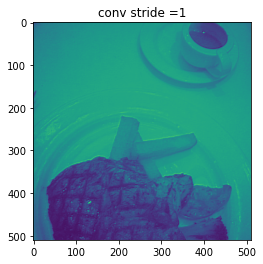

In [74]:
output = tf.squeeze(y)
plt.imshow(output[:,:,2])
plt.title("conv stride =1")

In [83]:
# With the dilation_rate as 2
y = tf.keras.layers.Conv2D(filters = 5,
                           kernel_size = (3,3),
                           activation = 'relu',
                           dilation_rate = 2,
                           input_shape = tensor.shape[1:]
                          )(tensor)
output = tf.squeeze(y)
output

<tf.Tensor: shape=(508, 508, 5), dtype=float32, numpy=
array([[[ 0.        ,  0.        , 17.56273   ,  0.        ,
          0.        ],
        [ 0.        ,  0.        , 19.397078  ,  0.        ,
          0.        ],
        [ 0.        ,  0.        , 23.55346   ,  0.        ,
          3.5847569 ],
        ...,
        [ 0.8685589 ,  0.        , 30.296291  ,  0.        ,
          4.5797024 ],
        [ 2.0169277 ,  0.        , 33.43601   ,  0.        ,
          2.7597656 ],
        [ 5.720894  ,  0.        , 37.16483   ,  0.        ,
          0.        ]],

       [[ 0.        ,  0.        , 21.094412  ,  0.        ,
          0.        ],
        [ 0.        ,  0.        , 23.296976  ,  0.        ,
          0.        ],
        [ 0.        ,  0.        , 22.369642  ,  0.        ,
          3.8448772 ],
        ...,
        [ 1.9234457 ,  0.        , 33.174984  ,  0.        ,
          1.8936367 ],
        [ 4.207265  ,  0.        , 34.155     ,  0.        ,
          0.    

Text(0.5, 1.0, 'dilation_rate = 2')

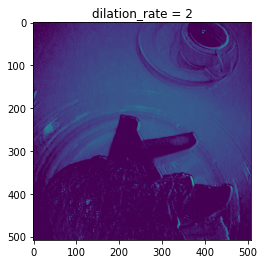

In [92]:
plt.imshow(output[:,:,4])
plt.title("dilation_rate = 2")

In [95]:
# With padding as same padding = 1
y =tf.keras.layers.Conv2D(filters = 4,
                         kernel_size = (3,3),
                         activation  ='relu',
                         padding = 'same',
                         input_shape = img.shape[1:])(tensor)
output = tf.squeeze(y)
output

<tf.Tensor: shape=(512, 512, 4), dtype=float32, numpy=
array([[[  0.       ,  19.51304  ,   7.057482 ,   0.       ],
        [  0.       ,   0.       ,   0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       ,   0.       ],
        ...,
        [  0.       ,   0.       ,   0.       ,   0.       ],
        [  0.       ,   0.       ,   0.       ,   0.       ],
        [ 32.62175  ,   0.       ,   0.       ,   0.       ]],

       [[  0.       ,  42.903904 ,  74.72214  ,   0.       ],
        [  0.       ,   0.       ,  34.327724 ,   0.       ],
        [  0.       ,   0.       ,  35.91947  ,   0.       ],
        ...,
        [  0.       ,   0.       ,  50.59843  ,   0.       ],
        [  0.       ,   0.       ,  45.62349  ,   0.       ],
        [ 72.05992  ,   0.       ,   0.       ,   0.       ]],

       [[  0.       ,  45.370197 ,  79.4494   ,   0.       ],
        [  0.       ,   0.       ,  35.721043 ,   0.       ],
        [  0.       ,   0.       ,  40.92642  ,

Text(0.5, 1.0, 'padding the same')

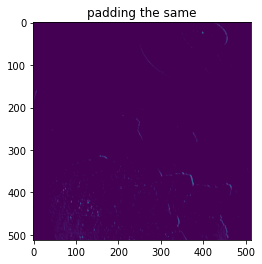

In [102]:
plt.imshow(output[:,:,1])
plt.title("padding the same")

### Pooling layer

- The pooling layer is in between 2 convolutional layer to reduce the size of but still keep the important information,

- In otherway, pooling layer make the dimension of image reduce, so the region convolutional layer can learn can be larger (pooling layer reduce 224x224 to 112x112 so 3x3 in 112x112 correctsponding with 6x6 in 224x224)

- With the pooling size `K*K` Input of pooling layer have `H*W*D` will seperate into D matrix with shape `H*W`, stride and padding rule still be the same in pooling layer

    * With th max pooling, find the maximum value in the region K*K
    
    * With th average pooling, find the everage value in the region K*K
    
 As usual the pooling layer have size = `(2,2)`, stride = `2`, padding = `0`, the height and width of the output will be become
 `height/2` and `width/2` the depth is still the same
 

### Max pooling layer

Text(0.5, 1.0, 'max pooling pool_size = (2,2)')

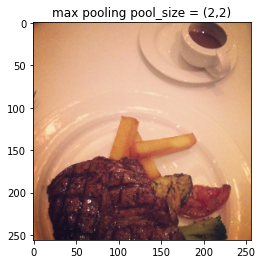

In [128]:
max_pool_2d = tf.keras.layers.MaxPool2D(pool_size = (2,2),
                                       strides = None,
                                       padding = 'valid',
                                       data_format = None
                                       )
output = max_pool_2d(tensor)
output = tf.squeeze(output)
output = tf.cast(output,dtype = tf.uint16)
plt.imshow(output)
plt.title("max pooling pool_size = (2,2)")

Text(0.5, 1.0, 'max pooling pool_size = (2,2) strides = (1,1)')

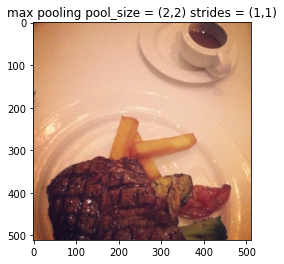

In [130]:
max_pool_2d = tf.keras.layers.MaxPool2D(pool_size = (2,2),
                                       strides = (1,1),
                                       padding = 'valid',
                                       data_format = None
                                       )
output = max_pool_2d(tensor)
output = tf.squeeze(output)
output = tf.cast(output,dtype = tf.uint16)
plt.imshow(output)
plt.title("max pooling pool_size = (2,2) strides = (1,1)")

Text(0.5, 1.0, 'max pooling pool_size = (2,2) strides = (2,2)')

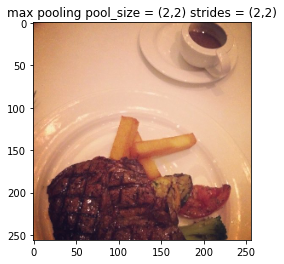

In [131]:
max_pool_2d = tf.keras.layers.MaxPool2D(pool_size = (2,2),
                                       strides = (2,2),
                                       padding = 'valid',
                                       data_format = None
                                       )
output = max_pool_2d(tensor)
output = tf.squeeze(output)
output = tf.cast(output,dtype = tf.uint16)
plt.imshow(output)
plt.title("max pooling pool_size = (2,2) strides = (2,2)")

### Average pooling layer

(511, 511, 3)


Text(0.5, 1.0, "averagepooling2D strides (1,1) padding = 'valid'")

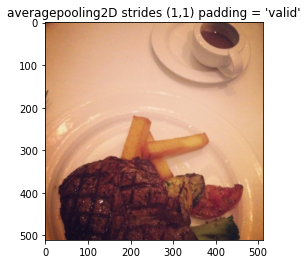

In [118]:
# for example, for strides (1,1) padding = 'valid'
# (512 - 2)/1 +1
avg_pool_2d = tf.keras.layers.AveragePooling2D(pool_size = (2,2),strides = (1,1), padding = 'valid')
output = avg_pool_2d(tensor)
output = tf.squeeze(output)
output = tf.cast(output,dtype = tf.uint16)
print(output.shape)
plt.imshow(output)
plt.title("averagepooling2D strides (1,1) padding = 'valid'")

(256, 256, 3)


Text(0.5, 1.0, "averagepooling2D-strides (2,2) padding = 'valid'")

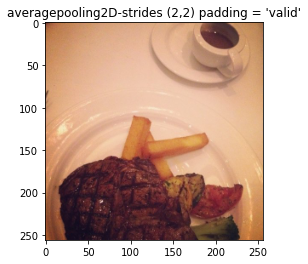

In [119]:
# for example, for strides (2,2) padding = 'valid'
# (512 - 2)/2 +1
avg_pool_2d = tf.keras.layers.AveragePooling2D(pool_size = (2,2),strides = (2,2), padding = 'valid')
output = avg_pool_2d(tensor)
output = tf.squeeze(output)
print(output.shape)
output = tf.cast(output,dtype = tf.uint16)
plt.imshow(output)
plt.title("averagepooling2D-strides (2,2) padding = 'valid'")